In [1]:
import pygad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Declare variables for data store
n_gen = []             ## stores num of generations
gen_x = []             ## stores solutions or features 
gen_y = []             ## stores target values
parents = []           ## store parents
off_cross = []         ## store crossover offspring
off_mut = []           ## store mutation offspring
last_fitness = 0

In [3]:
## Input array of data
x = np.array([[1,2,3,1],[2,3,1,0],[2,2,0,0],[0,5,2,1],[7,1,2,3],
               [4,3,5,0],[5,2,1,5],[1,2,0,2],[3,0,5,5],[1,1,4,1]])

In [4]:
print (f"Initial population: \n {x}")


Initial population: 
 [[1 2 3 1]
 [2 3 1 0]
 [2 2 0 0]
 [0 5 2 1]
 [7 1 2 3]
 [4 3 5 0]
 [5 2 1 5]
 [1 2 0 2]
 [3 0 5 5]
 [1 1 4 1]]


In [5]:
## single-objective fitness function
def fitness(genetic, solution, sol_idx):
    # rez1 = np.power(solution,2).sum()       ## maximize the sum of squares as fitness functions
    rez1 = solution.sum()                     ## maximize the sum of entries as fitness functions
    # print (rez)
    return rez1                              

## Parents selected function
def on_parents(genetic, selected_parents):
    global parents
    # print ("\n ***Parents selected****")
    print(f"Selected parents = \n {selected_parents}")
    parents.append(selected_parents)

## Data for each generation -------------------------------------------    
def on_generation(genetic):
    global n_gen, gen_x,gen_y                     ## Define a global variable
    global last_fitness
    
    print("Generation = ", genetic.generations_completed)
    # print(f"Fitness    = {genetic.best_solution(pop_fitness=genetic.last_generation_fitness)[1]}")
    # print(f"Change     = {genetic.best_solution(pop_fitness=genetic.last_generation_fitness)[1] - last_fitness}")
    # print (f"Population  = \n {genetic.population}")
    
    n_gen.append(genetic.generations_completed)  ## append solutions to a list
    gen_x.append(genetic.solutions)
    gen_y.append(genetic.solutions_fitness)
    
    last_fitness = genetic.best_solution(pop_fitness=genetic.last_generation_fitness)[1]

## Crossover function
def on_crossover(ga_instance, offspring_crossover):
    global off_cross
    off_cross.append(offspring_crossover)
    print("on_crossover() \n",  offspring_crossover)

## Mutation function
def on_mutation(ga_instance, offspring_mutation):
    global off_mut
    off_mut.append(offspring_mutation)
    print("on_mutation() \n", offspring_mutation)
    
## Stopping criteria 
def on_stop(ga_instanse, last_gen_fitness):
    print("on_stop")


In [6]:
genetic = pygad.GA( num_generations= 5,
                    num_parents_mating = 2,
                    
                    fitness_func = fitness,
                    initial_population = x,
                    
                    parent_selection_type = "sss",  ## single-objective
                    # K_tournament = 5,
                    
                    crossover_type = 'single_point',
                    on_crossover = on_crossover,
                    
                    mutation_type = 'random',
                    on_mutation = on_mutation,
                    
                    on_generation= on_generation,
                    on_parents= on_parents,
                    
                    save_solutions= True,            ## all solutions in each generation are appended into an attribute called solutions
                    save_best_solutions= True,       ## best solution after each generation is saved into an attribute named best_solutions
                    gene_type = [float, 3],
                    
                    random_seed = 123)                  ## reproducible results


In [7]:
genetic.run()

Selected parents = 
 [[3. 0. 5. 5.]
 [5. 2. 1. 5.]]
on_crossover() 
 [[3. 0. 1. 5.]
 [5. 0. 5. 5.]
 [3. 0. 1. 5.]
 [5. 2. 5. 5.]
 [5. 2. 1. 5.]
 [5. 2. 5. 5.]
 [3. 0. 1. 5.]
 [5. 0. 5. 5.]
 [3. 0. 5. 5.]]
on_mutation() 
 [[2.982 0.    1.    5.   ]
 [5.    0.    5.56  5.   ]
 [2.822 0.    1.    5.   ]
 [5.    2.    5.    5.159]
 [5.    2.    0.28  5.   ]
 [4.802 2.    5.    5.   ]
 [3.255 0.    1.    5.   ]
 [5.    0.    5.    4.648]
 [3.    0.    4.49  5.   ]]
Generation =  1
Selected parents = 
 [[5.    2.    5.    5.159]
 [4.802 2.    5.    5.   ]]
on_crossover() 
 [[4.802 2.    5.    5.   ]
 [5.    2.    5.    5.159]
 [4.802 2.    5.    5.   ]
 [5.    2.    5.    5.159]
 [5.    2.    5.    5.   ]
 [4.802 2.    5.    5.159]
 [5.    2.    5.    5.   ]
 [4.802 2.    5.    5.159]
 [4.802 2.    5.    5.   ]]
on_mutation() 
 [[4.802 2.    5.063 5.   ]
 [5.064 2.    5.    5.159]
 [4.802 2.269 5.    5.   ]
 [5.    2.699 5.    5.159]
 [5.    2.    5.449 5.   ]
 [4.802 2.    5.222 5.159]
 [5.

In [8]:
solution, solution_fitness, solution_idx = genetic.best_solution(genetic.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")


Parameters of the best solution : [5.    3.67  5.449 6.169]
Fitness value of the best solution = 20.288
Index of the best solution : 9


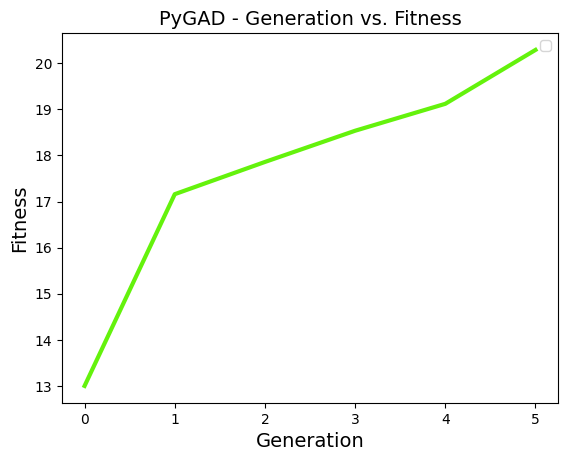

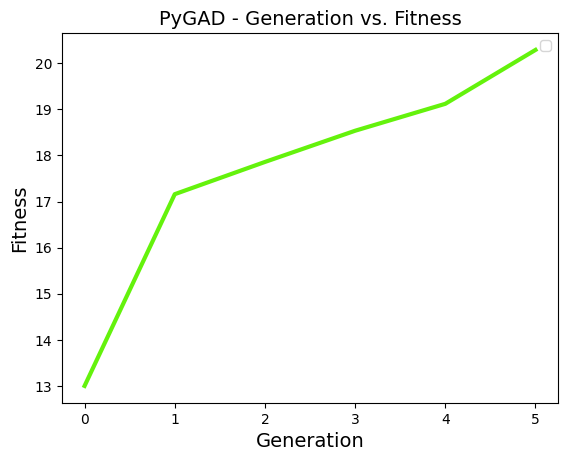

In [9]:
genetic.plot_fitness(label=['Objective'])